In [3]:
# Install necessary libraries
!pip install pandas numpy scikit-learn matplotlib seaborn joblib

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [4]:
# Load dataset
file_path = '/content/credit_risk_dataset.csv'
data = pd.read_csv(file_path)

print("Dataset Info:")
print(data.info())
print("\nSample Data:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None

Sample Data

In [5]:
# 1. Encode categorical columns
data['person_home_ownership'] = data['person_home_ownership'].map({'RENT': 0, 'OWN': 1, 'MORTGAGE': 2})
data['loan_intent'] = data['loan_intent'].map({'PERSONAL': 0, 'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE': 3, 'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION': 5})
data['loan_grade'] = data['loan_grade'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})
data['cb_person_default_on_file'] = data['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

In [6]:
# 2. Handle missing values (jika ada)
data = data.dropna()  # Hapus baris dengan nilai yang hilang

In [7]:
# 3. Pastikan semua kolom numerik
print("\nCleaned Data:")
print(data.head())


Cleaned Data:
   person_age  person_income  person_home_ownership  person_emp_length  \
0          22          59000                    0.0              123.0   
1          21           9600                    1.0                5.0   
2          25           9600                    2.0                1.0   
3          23          65500                    0.0                4.0   
4          24          54400                    0.0                8.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_status  \
0            0           4      35000          16.02            1   
1            1           2       1000          11.14            0   
2            2           3       5500          12.87            1   
3            2           3      35000          15.23            1   
4            2           3      35000          14.27            1   

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                       

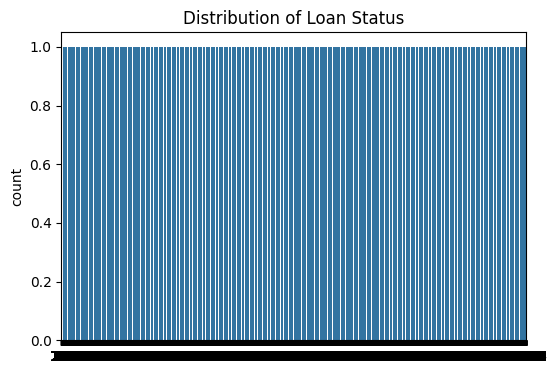

In [8]:
# EDA
# Distribusi target
plt.figure(figsize=(6, 4))
sns.countplot(data['loan_status'])
plt.title("Distribution of Loan Status")
plt.show()

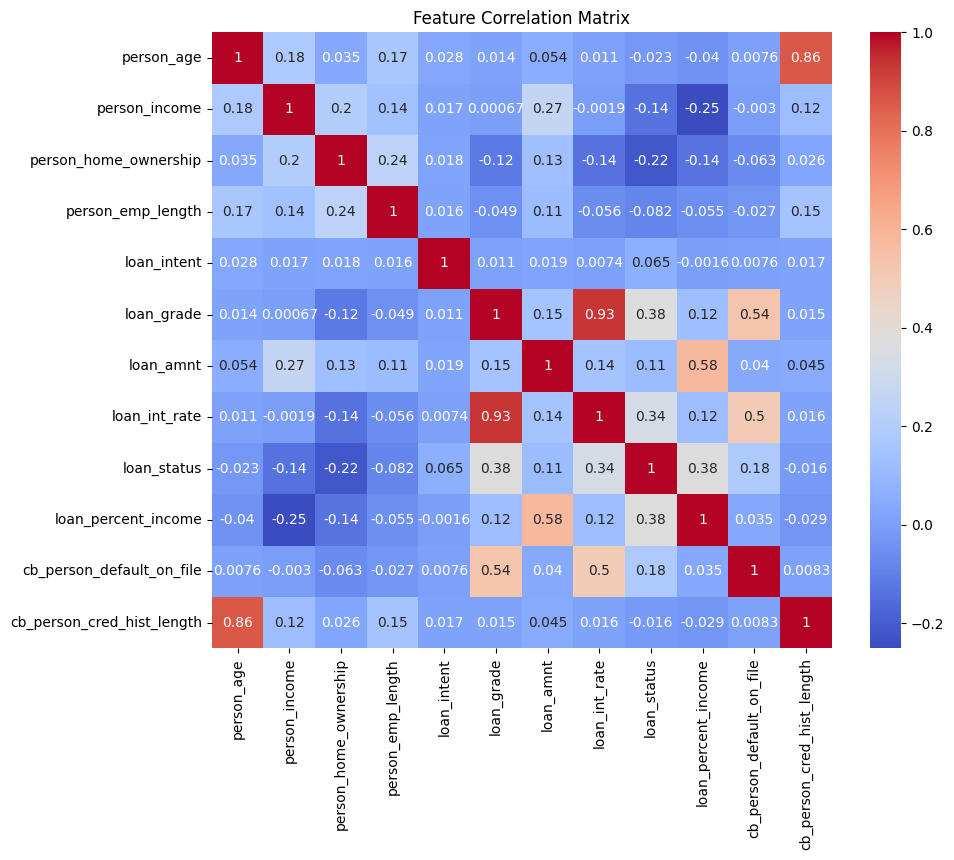

In [9]:
# Korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [10]:
# Split data
X = data.drop(columns=['loan_status'])  # Semua fitur kecuali target
y = data['loan_status']                # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Model 1: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4530
           1       0.96      0.73      0.83      1179

    accuracy                           0.94      5709
   macro avg       0.95      0.86      0.89      5709
weighted avg       0.94      0.94      0.93      5709

Confusion Matrix:
[[4492   38]
 [ 320  859]]


In [12]:
params = {'n_estimators': [50, 100, 150], 'max_depth': [10, 20, None]}
grid_rf = GridSearchCV(rf, params, cv=3, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print("\nBest Parameters for Random Forest:", grid_rf.best_params_)


Best Parameters for Random Forest: {'max_depth': None, 'n_estimators': 50}


In [13]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Model 2: SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\nSVM Results:")
print(classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM Results:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      4530
           1       0.84      0.15      0.26      1179

    accuracy                           0.82      5709
   macro avg       0.83      0.57      0.58      5709
weighted avg       0.82      0.82      0.76      5709


Confusion Matrix:
[[4495   35]
 [1001  178]]


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Generate random data (replace with your actual data loading if available)
np.random.seed(42)
n_samples = 100
X = np.random.rand(n_samples, 5)  # 5 features
y = np.random.randint(0, 2, n_samples)  # Binary classification (0 or 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

# SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

print("\nSVM Classification Report:")
print(classification_report(y_test, svm_predictions))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.90      0.64        10
           1       0.50      0.10      0.17        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.40        20
weighted avg       0.50      0.50      0.40        20

Random Forest Confusion Matrix:
[[9 1]
 [9 1]]

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        10
           1       0.00      0.00      0.00        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20

SVM Confusion Matrix:
[[10  0]
 [10  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
import joblib

# Simpan model Random Forest
joblib.dump(rf, 'random_forest_model.pkl')

# Simpan model SVM
joblib.dump(svm, 'svm_model.pkl')

print("Model Random Forest dan SVM berhasil disimpan sebagai file .pkl")

Model Random Forest dan SVM berhasil disimpan sebagai file .pkl
